### **Theory + Code:** https://www.youtube.com/watch?v=N1vOgolbjSc

**This hyperplane best splits the data because it is as far as possible from these support vectors(data points) which is another way of saying that we maximised the margin.**

Maximising the margin is a **constrained optimisation** problem as we have constraints of not overlapping the support vectors and the hyperplane and keep the margin max as possible.

**SVM**
- **Pros:** 
- Good at dealing with high dimensionality
- Works well on small data sets

- **Cons:** 
- Picking the right kernel and parameters can be computationally intensive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.2)
import pickle

In [2]:
#import data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
print("Data imported")

#All ingredients are normalised in % and each row adds upto 100%

Data imported


In [3]:
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


Data is normalised from quantity-based to percentage based as ingredients in each reciipe peoduced a different qty. of batter. 

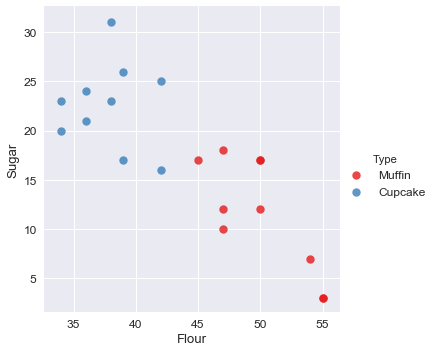

In [4]:
#plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

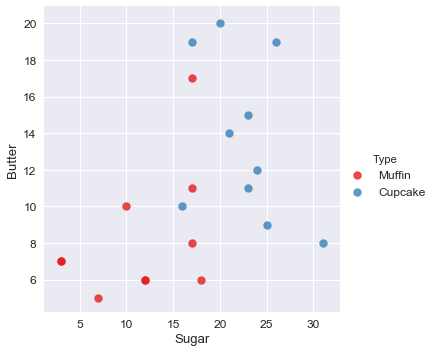

In [5]:
#plot two ingredients
sns.lmplot('Sugar','Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

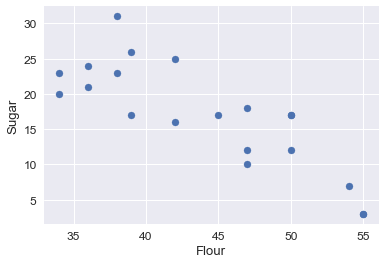

In [6]:
plt.scatter('Flour','Sugar', data = recipes)
plt.xlabel("Flour")
plt.ylabel("Sugar")
plt.show() #Gives all the points in one color

In [7]:
#Specify inputs for the model

# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
#use in case of high dimension modelling

#Currently we'll use only 2 variables

ingredients = recipes[['Flour','Sugar']].as_matrix()
#ingredients = recipes[['Flour','Sugar']] #dataframe
#ingredients = recipes['Flour','Sugar'].as_matrix #Keyerror
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

In [8]:
type_label = np.where(recipes['Type'] == 'Muffin',0,1)
type_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
help(np.where)

Help on built-in function where in module numpy.core.multiarray:

where(...)
    where(condition, [x, y])
    
    Return elements, either from `x` or `y`, depending on `condition`.
    
    If only `condition` is given, return ``condition.nonzero()``.
    
    Parameters
    ----------
    condition : array_like, bool
        When True, yield `x`, otherwise yield `y`.
    x, y : array_like, optional
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray or tuple of ndarrays
        If both `x` and `y` are specified, the output array contains
        elements of `x` where `condition` is True, and elements from
        `y` elsewhere.
    
        If only `condition` is given, return the tuple
        ``condition.nonzero()``, the indices where `condition` is True.
    
    See Also
    --------
    nonzero, choose
    
    Notes
    -----
    If `x` and `y` are given and input arrays are

In [10]:
#Feature Names
recipe_features = recipes.columns.values[1:].tolist()
#recipe_features = recipes.columns.values[1:] == array
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [11]:
ingredients = recipes[['Flour','Sugar']].as_matrix()
print(type(ingredients))

type_label = np.where(recipes['Type']=='Muffin', 0, 1)
print(type(type_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
#Fit the model
from sklearn import svm

#SVC = Classifier
#(X,y)

# Fit the SVM model
model = svm.SVC(kernel='linear',random_state = 0)
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

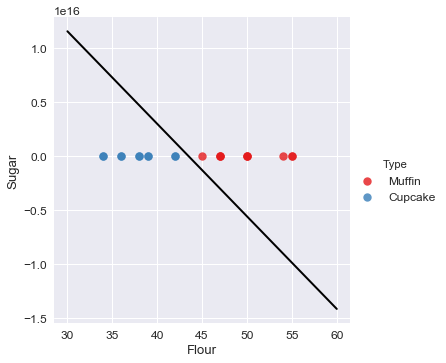

In [13]:
#Visualise the results

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

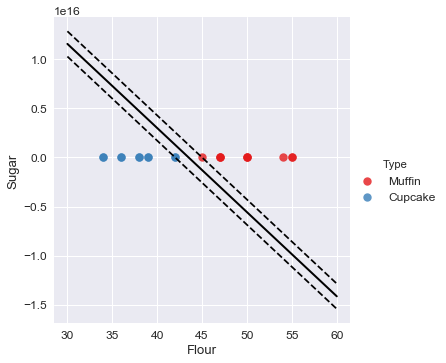

In [14]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [15]:
#Predict a new case

#Create a fn. to guess when a new recipe
def muffin_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) == 0:
        print("You're looking at a Muffin recipe!")
    else:
        print("You're looking at a Cupcake recipe!")

In [16]:
muffin_cupcake(50,20)

You're looking at a Muffin recipe!


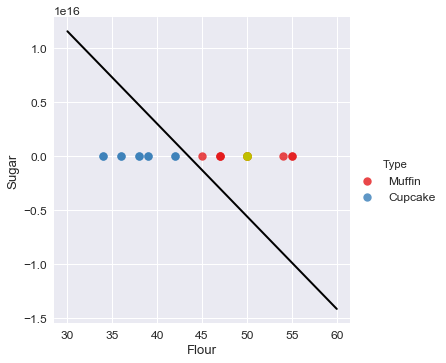

In [17]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [18]:
muffin_cupcake(40,20)

You're looking at a Cupcake recipe!


In [19]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [20]:
muffin_cupcake_dict

{'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt'],
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'muffin_cupcake_model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=0, shrinking=True,
   tol=0.001, verbose=False)}

In [21]:
#Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [22]:
#S = String
pickle.dumps(muffin_cupcake_dict)

b'\x80\x03}q\x00(X\x14\x00\x00\x00muffin_cupcake_modelq\x01csklearn.svm.classes\nSVC\nq\x02)\x81q\x03}q\x04(X\x17\x00\x00\x00decision_function_shapeq\x05X\x03\x00\x00\x00ovrq\x06X\x05\x00\x00\x00_implq\x07X\x05\x00\x00\x00c_svcq\x08X\x06\x00\x00\x00kernelq\tX\x06\x00\x00\x00linearq\nX\x06\x00\x00\x00degreeq\x0bK\x03X\x05\x00\x00\x00gammaq\x0cX\x04\x00\x00\x00autoq\rX\x05\x00\x00\x00coef0q\x0eG\x00\x00\x00\x00\x00\x00\x00\x00X\x03\x00\x00\x00tolq\x0fG?PbM\xd2\xf1\xa9\xfcX\x01\x00\x00\x00Cq\x10G?\xf0\x00\x00\x00\x00\x00\x00X\x02\x00\x00\x00nuq\x11G\x00\x00\x00\x00\x00\x00\x00\x00X\x07\x00\x00\x00epsilonq\x12G\x00\x00\x00\x00\x00\x00\x00\x00X\t\x00\x00\x00shrinkingq\x13\x88X\x0b\x00\x00\x00probabilityq\x14\x89X\n\x00\x00\x00cache_sizeq\x15K\xc8X\x0c\x00\x00\x00class_weightq\x16NX\x07\x00\x00\x00verboseq\x17\x89X\x08\x00\x00\x00max_iterq\x18J\xff\xff\xff\xffX\x0c\x00\x00\x00random_stateq\x19K\x00X\x07\x00\x00\x00_sparseq\x1a\x89X\r\x00\x00\x00class_weight_q\x1bcnumpy.core.multiarray\n_reco

## Making SVM more powerful!

### Higher Dimensions

In [23]:
ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

In [24]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

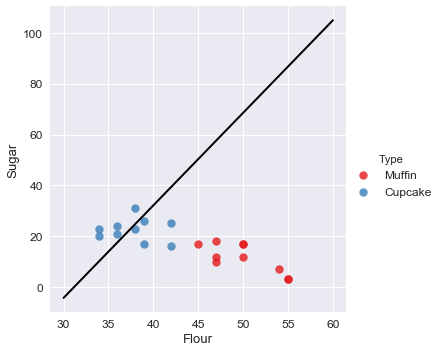

In [25]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
#sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black');

**need to check how to visualise results with high dim. **

### C parameter

**It allows you to decide how much you want to penalize misclassified points. **

In [26]:
ingredients = recipes[['Flour','Sugar']].as_matrix()
print(type(ingredients))

type_label = np.where(recipes['Type']=='Muffin', 0, 1)
print(type(type_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


**Low C value** : Prioritize simplicity(softer margins)

In [27]:
#Fit the model
from sklearn import svm

#SVC = Classifier
#(X,y)

# Fit the SVM model
model = svm.SVC(kernel='linear', C =2 ** -5,random_state = 0)
model.fit(ingredients, type_label)

SVC(C=0.03125, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

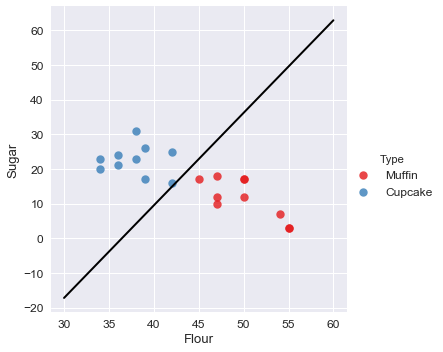

In [28]:
#Visualise the results

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

**High C Value **: Prioritize making a few mistakes(intentionally overfitting)

try different values of C to find the best one

In [29]:
ingredients = recipes[['Flour','Sugar']].as_matrix()
print(type(ingredients))

type_label = np.where(recipes['Type']=='Muffin', 0, 1)
print(type(type_label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
#Fit the model
from sklearn import svm

#SVC = Classifier
#(X,y)

# Fit the SVM model
model = svm.SVC(kernel='linear', C =2 ** 5,random_state = 0)
model.fit(ingredients, type_label)

SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

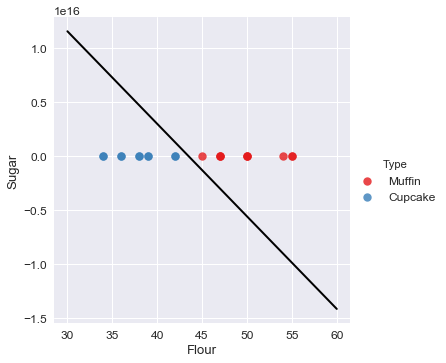

In [31]:
#Visualise the results

# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

### Multiple Classes

SVC can be used for classification of multiple classes.
- Use Skone dataset
- set ** decision_function_shape = 'ovr' ** in SVC initilization 

**OVR: One Vs Rest** 
- Pros: Fewer runs to acheive Classifications     
- Cons: Classes may be imbalanced

**OVO: One Vs One**
- Pros: :Less sensitive to imbalance
- Cons: More runs to acheive classifications

In [34]:
#import Scones dataset
df_scones = pd.read_csv("recipes_muffins_cupcakes_scones.csv")
print("Data imported\n")
df_scones.head()

Data imported



,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


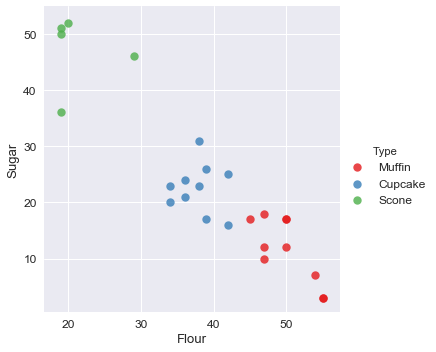

In [37]:
#Plot data
sns.lmplot('Flour', 'Sugar', data = df_scones, hue = 'Type',
          palette = 'Set1', fit_reg = False, scatter_kws = {"s":70})

In [51]:
#Specify inputs / ingredients
X = df_scones[['Flour','Sugar']].as_matrix()
#type_labels = df_scones['Type']
type_labels = df_scones['Type'].map({'Muffin':0, 'Cupcake':1, 'Scone':2})
#type_labels = np.where(df_scones['Type'] ==)

In [52]:
type_labels

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    2
21    2
22    2
23    2
24    2
Name: Type, dtype: int64

In [66]:
#Fit the model
model_scones = svm.SVC(kernel = 'linear', decision_function_shape='ovr', random_state = 0)
model_scones.fit(X, type_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

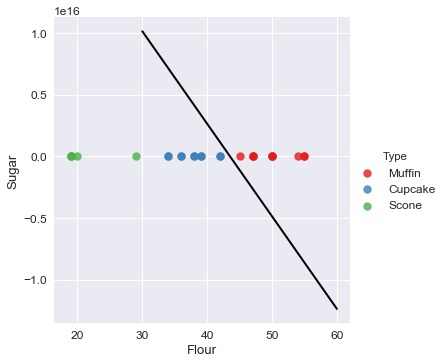

In [67]:
#Visualise the results
# Get the separating hyperplane
w = model_scones.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model_scones.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model_scones.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model_scones.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=df_scones, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

**Linear kernel can't classify multiple classes**

**Trying with RBF kernel**

In [69]:
#Fit the model
model_scones = svm.SVC(kernel = 'rbf',C = 1, gamma= 2,random_state=0) # decision_function_shape='ovr')
model_scones.fit(X, type_labels)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

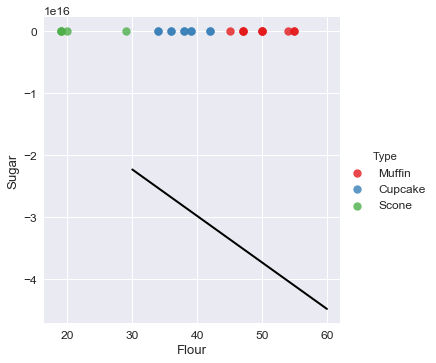

In [70]:
#Visualise the results
# Get the separating hyperplane
#w = model_scones.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model_scones.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model_scones.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model_scones.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=df_scones, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

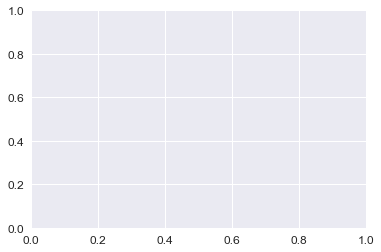

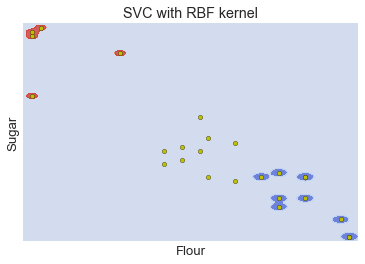

In [61]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = model_scones.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# title for the plots
titles = ('SVC with RBF kernel')

# Set-up 2x2 grid for plotting.
#fig, sub = plt.subplots(2, 2)
#plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#for clf, title, ax in zip(models, titles, sub.flatten()):

fig, ax = plt.subplots()
#is more concise than this:
fig = plt.figure()
ax = fig.add_subplot(111)


plot_contours(ax, model_scones, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c='y', cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Flour')
ax.set_ylabel('Sugar')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(titles)    

plt.show()


### Kernel Trick

Kernel tries to add another dimension to the data to make classification meaningful and easier to visualise like moving from 2D to 3D.

**Kernel options:**
- Linear
- RBF(Radial Basis Function) -> Most popular
- Polynomial
- Sigmoid

**RBF Kernel**

with RBF C & gamma are also defined manually. 
- C can be defined as 1 (default value) but find the best value by trial-error

- **Gamma** 
- can be defined as 2 (default value) but find the best value by trial-error or Grid search

- **Small Gamma** : less complexity
- **High Gamma** : high complexity (intentional overfitting)

In [32]:
# Fit the SVM model
model = svm.SVC(kernel='rbf', C =1,gamma = 2**5,random_state = 0)
model.fit(ingredients, type_label)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=32, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)